In [5]:
%matplotlib inline
%pylab inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


In [7]:
df = pd.read_csv('parallel_merge_random_2_rt_pol.csv', names=['k','node','number_influenced','s'])

In [8]:
MIN_V_VALUE = 1
MAX_V_VALUE = 18470
BORDER = 200

In [9]:
df.groupby(['node','s'], sort=False)['k'].max()
idx = df.groupby(['node','s'])['k'].transform(max) == df['k']

In [10]:
df_sub_sample = df[idx][['node','number_influenced','s']]

In [11]:
df_sub_sample = df_sub_sample.reset_index(drop=True)
df_sub_sample.head()

,node,number_influenced,s
0,9,1,0
1,9,111,1
2,9,616,2
3,9,6214,3
4,9,12972,4


In [12]:
level_dummy_df = []
for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_sub_sample['node'].unique():    
    df_sub_to_fill = df_sub_sample.loc[df_sub_sample['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_sub_sample = pd.concat(list_to_contact_df)

In [13]:
df_sub_sample = df_sub_sample.sort_values(by=['node'])

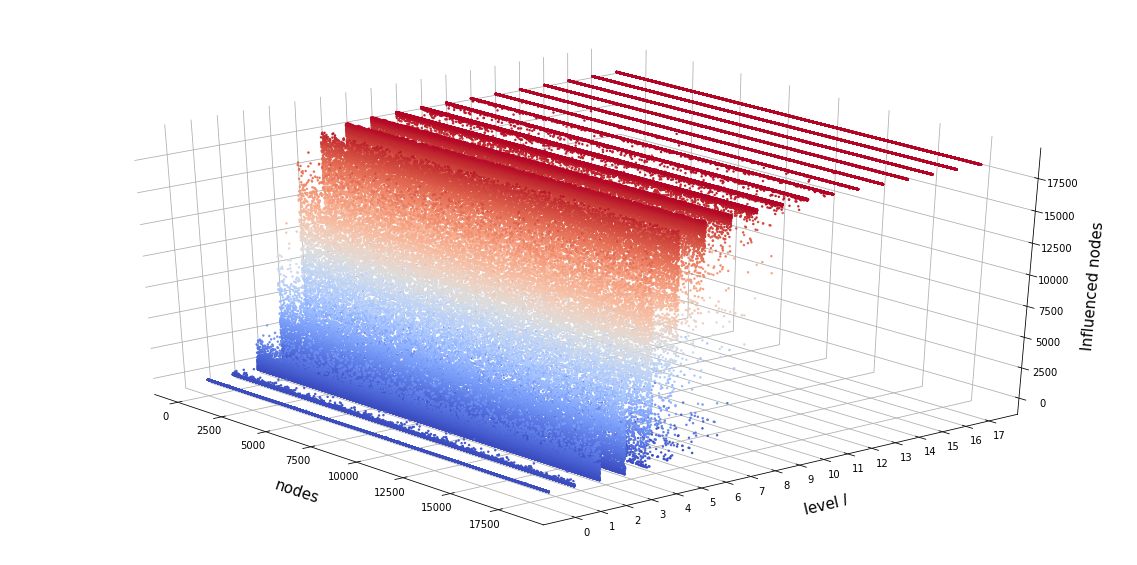

In [14]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sub_sample['node'],
           df_sub_sample['s'],
           df_sub_sample['number_influenced'],
           c=df_sub_sample['number_influenced'],
           linewidth=0,
           s=6, 
           cmap=cm.coolwarm, depthshade=False,
           vmin=MIN_V_VALUE,
           vmax=MAX_V_VALUE)

matplotlib.pyplot.yticks(range(0, 18))

ax.set_xlabel('nodes', fontsize=15)
ax.set_ylabel(r'level $\it{l}$', fontsize=15)
ax.set_zlabel('Influenced nodes', fontsize=15)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 10

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.view_init(30, -40)

plt.show()

In [15]:
count_s = df_sub_sample[['s','node']].groupby(['s'], as_index=False).count().sort_values(by=['s'])

In [16]:
y_second_label = []
y_second_label.append('')
for r in count_s['node']:
    y_second_label.append('{}'.format(r))
    
y_second_label.append(r'$\sum$')

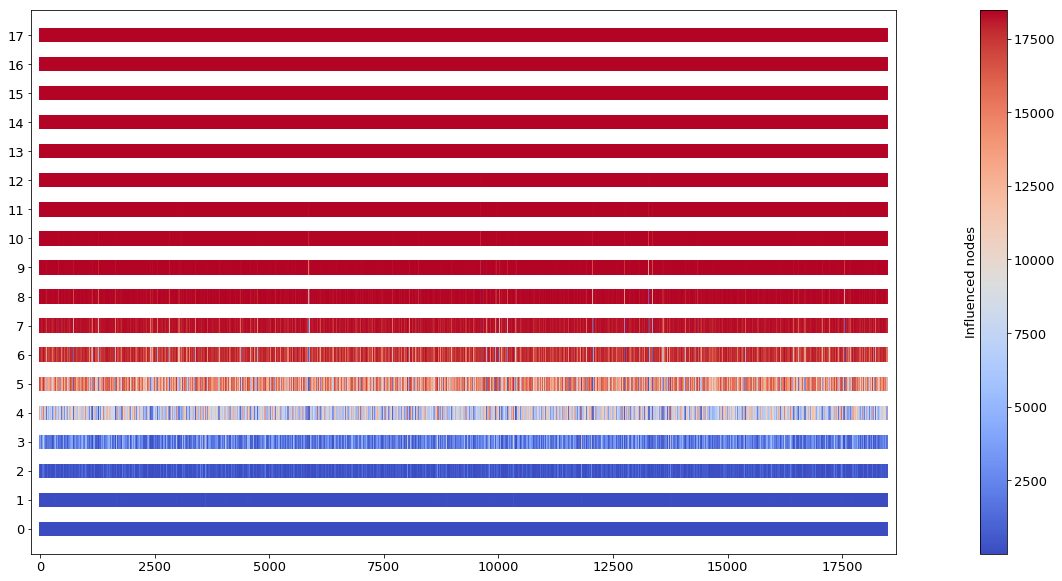

In [17]:
import matplotlib.pyplot as plt
from numpy.random import rand
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

fig, ax = plt.subplots(figsize=(20, 10))
sc = ax.scatter(df_sub_sample['node'], 
                df_sub_sample['s'],
                c=df_sub_sample['number_influenced'],
                cmap=cm.coolwarm, 
                s=200, 
                marker='|',
                vmin=MIN_V_VALUE,
                vmax=MAX_V_VALUE)

matplotlib.pyplot.yticks(range(0, 18))
matplotlib.pyplot.xlim(xmin=-BORDER)
matplotlib.pyplot.xlim(xmax=MAX_V_VALUE + BORDER)

#ax.set_xlabel('nodes', fontsize=15)
#ax.set_ylabel(r'level $\it{l}$', fontsize=16)

#plt.title('Linear Threshold Rank: rt-pol - min', fontsize=15)

cbar = plt.colorbar(sc, pad=0.075)
cbar.ax.set_ylabel('Influenced nodes', rotation=90,  labelpad=-90, fontsize=13)

#ax2 = ax.twinx()
#ax2.set_yticks(range(0, 20))
#ax2.set_yticklabels(y_second_label)

plt.show()